In [34]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats 
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)
sns.set(style="darkgrid", font_scale=1.2)

In [35]:
#chapter-10

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [36]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0.0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()

dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


In [37]:
#sns.histplot(dfLE)

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [38]:
# add a column for GDP per Capita
dfLE['GDP_per_Capita'] = (dfLE['GDP'] / dfLE['Population'])

In [39]:
#dfLE=dfLE[~np.isnan(dfLE)]

In [40]:
# Print 10 random rows of GDP per Capita
dfLE['GDP_per_Capita'].head(10)

0    0.000034
1    0.003042
2    0.000132
3    0.000195
4         NaN
5    0.000348
6    0.001970
7    0.007551
8    0.005224
9    0.001531
Name: GDP_per_Capita, dtype: float64

In [41]:
#removing NAN's from the GDP per Capita Data
df_p=dfLE["GDP_per_Capita"]
df_p=df_p[~np.isnan(df_p)]
df_p.head()


0    0.000034
1    0.003042
2    0.000132
3    0.000195
5    0.000348
Name: GDP_per_Capita, dtype: float64

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

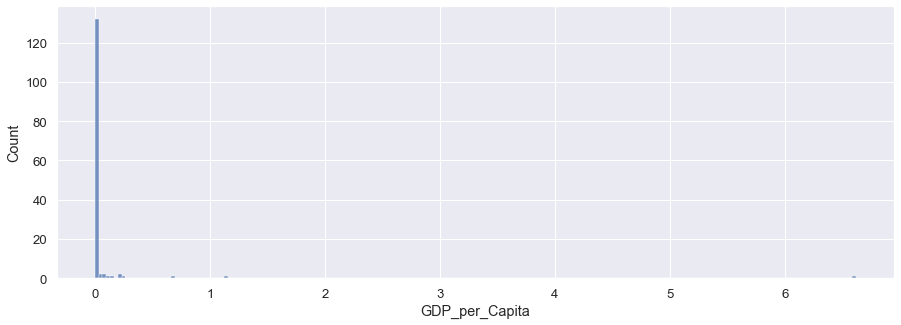

In [42]:
#Plottng histogram for GDP per Capita Data
sns.histplot(df_p, bins=200)

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [43]:
#Graph
#hist2 = thinkstats2.Hist(round(dfEL))
hist2 = thinkstats2.Hist(df_p)
pmf2 = thinkstats2.Pmf(df_p)
cdf2 = thinkstats2.Cdf(df_p)

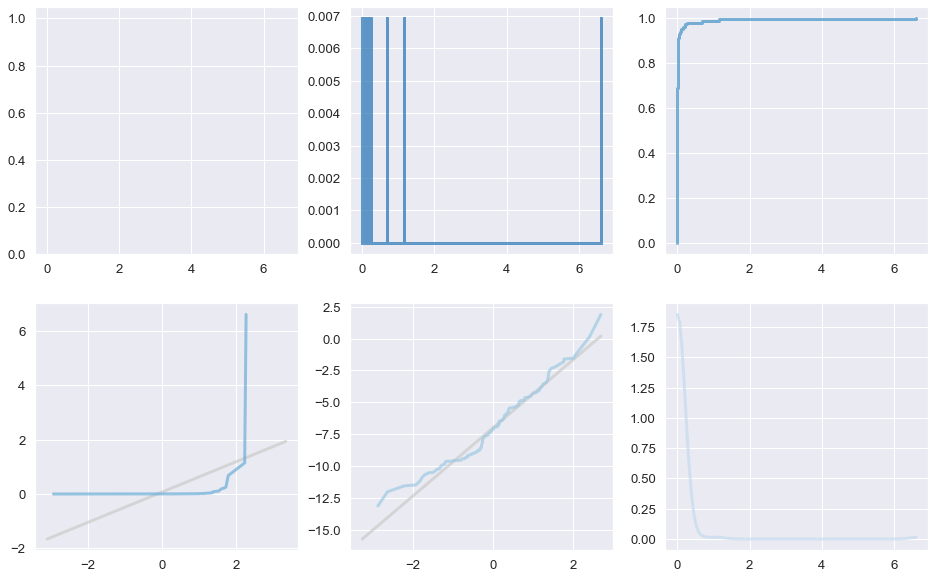

In [44]:
#Print all distributions
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df_p)
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df_p))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df_p) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [45]:
#Analytical for Schooling
dfs=dfLE["Schooling"]
dfs=dfs[~np.isnan(dfs)]

c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

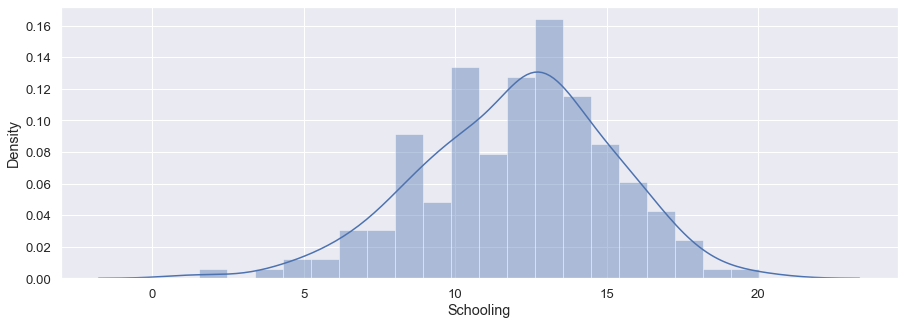

In [46]:
#sns.displot(penguins, x="flipper_length_mm", bins=20)
sns.distplot(dfs,bins=20)

In [47]:
from scipy.stats import expon
import matplotlib.pyplot as plt

In [48]:
#Make analytical dist.
mu1 = dfs.mean()
sigma1 = dfs.std()
mu1, sigma1

(12.027738764044944, 3.104851565570136)

In [49]:
#Make an analytical distribution
dfs_a = scipy.stats.norm(mu1,sigma1)


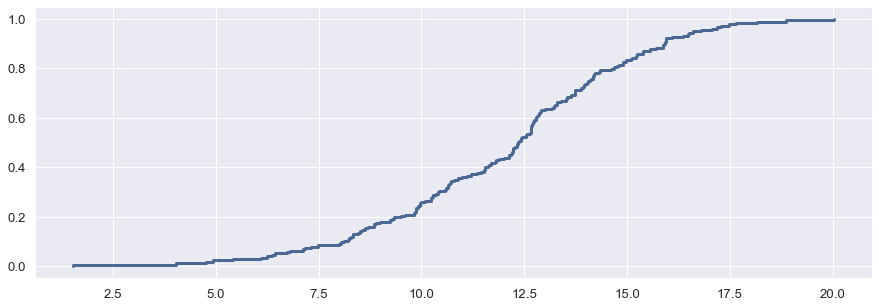

In [50]:
#Make an emperical CDF
cdf_es = thinkstats2.Cdf(dfs)
thinkplot.Cdf(cdf_es)
sns.set(style="darkgrid", font_scale=1.2)



<AxesSubplot:ylabel='Proportion'>

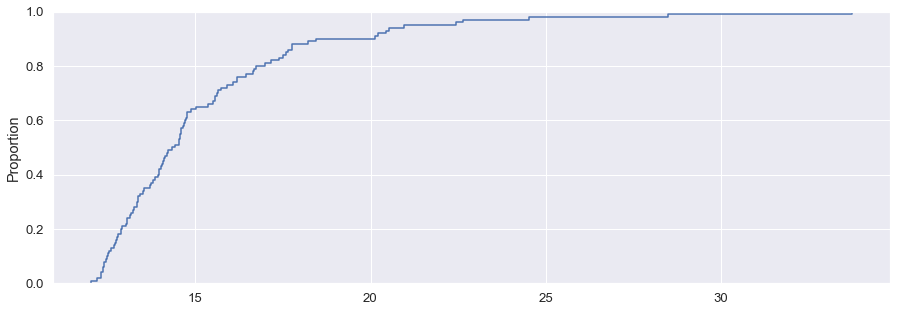

In [51]:
#dfs=dfLE["Schooling"]
#dfs=dfs[~np.isnan(dfs)]
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(dfLE["Schooling"]), loc=np.mean(dfLE["Schooling"])))

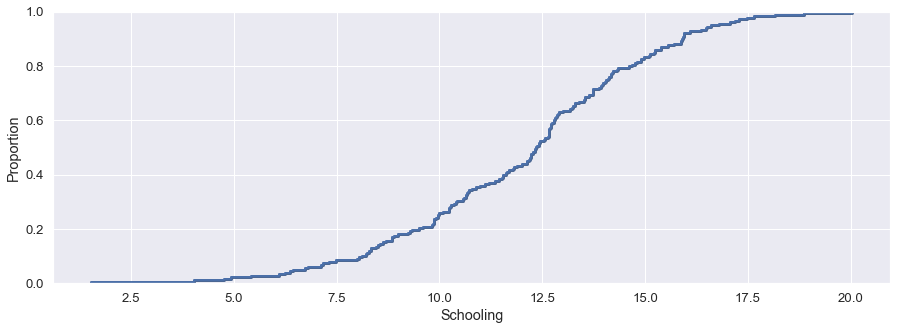

In [52]:
s_cdf = thinkstats2.Cdf(dfLE["Schooling"])
thinkplot.Cdf(s_cdf)
sns.ecdfplot(data=dfLE["Schooling"])
sns.set(style="darkgrid", font_scale=1.2)

<AxesSubplot:ylabel='Proportion'>

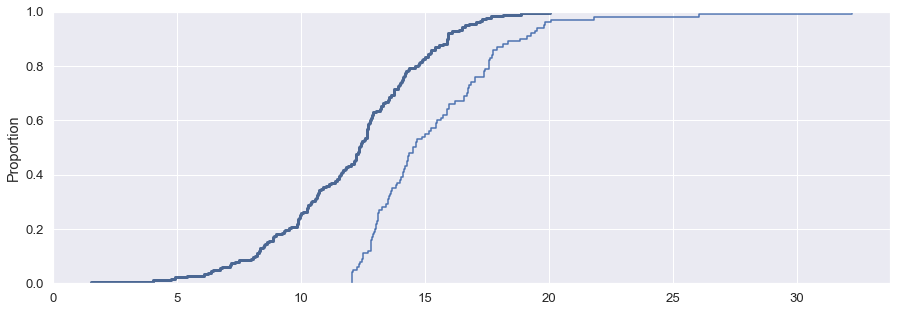

In [53]:
s_cdf = thinkstats2.Cdf(dfLE["Schooling"])
thinkplot.Cdf(s_cdf)
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(dfLE["Schooling"]), loc=np.mean(dfLE["Schooling"])))

In [54]:
dfs.describe()

count    178.000000
mean      12.027739
std        3.104852
min        1.531250
25%        9.971875
50%       12.359375
75%       14.093750
max       20.037500
Name: Schooling, dtype: float64

In [55]:
def bigGraph(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

In [56]:
bigGraph(dfs,"Schooling")

KeyError: 'Schooling'

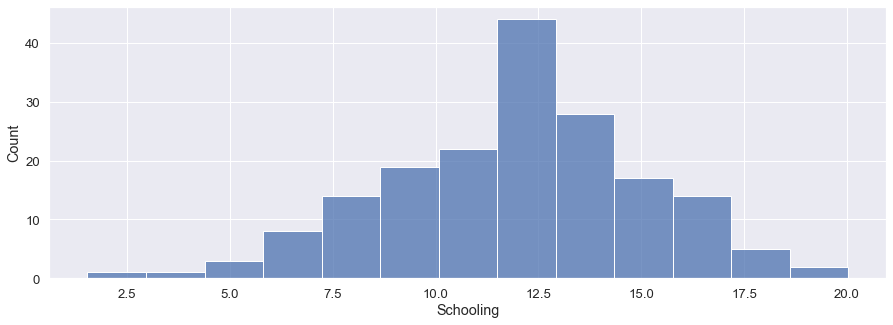

In [ ]:
sns.histplot(dfs)
sns.set(style="darkgrid", font_scale=1.2)

c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


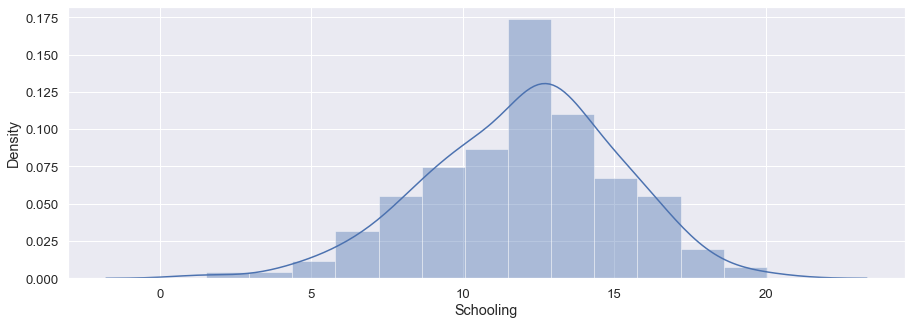

In [ ]:

sns.distplot(dfs)
sns.set(style="darkgrid", font_scale=1.2)

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [ ]:
df_p.describe()

count    144.000000
mean       0.069740
std        0.561366
min        0.000002
25%        0.000113
50%        0.000744
75%        0.006091
max        6.616857
Name: GDP_per_Capita, dtype: float64

In [ ]:
#Analytical for GDP/capita
pc_mean=np.mean(dfLE["GDP_per_Capita"])
pc_median=np.median(dfLE["GDP_per_Capita"])
#pc_std=np.std(dfLE["GDP_per_Capita"])
print(pc_mean)
print(pc_median)
#print(pc_std)



0.06974011278698682
nan


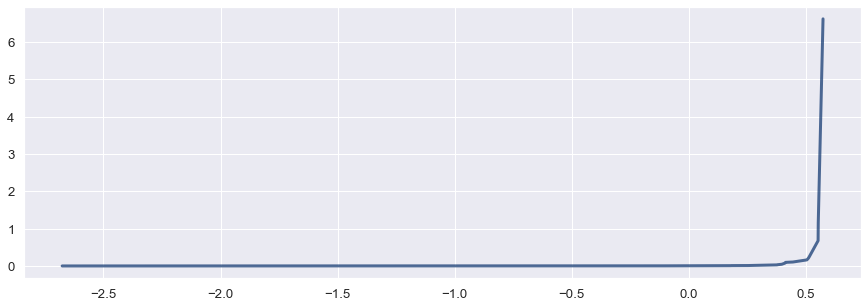

In [ ]:
thinkstats2.NormalProbabilityPlot(dfLE["GDP_per_Capita"])
## jump in graph at the end shows exponential growth- generally exponential numbers are plotted against time.

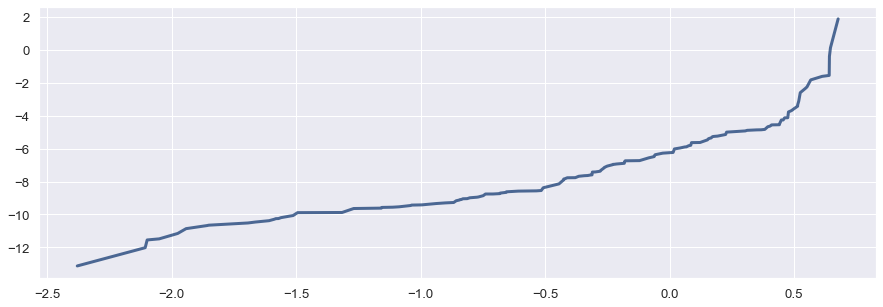

In [ ]:
thinkstats2.NormalProbabilityPlot(np.log(dfLE["GDP_per_Capita"]))

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

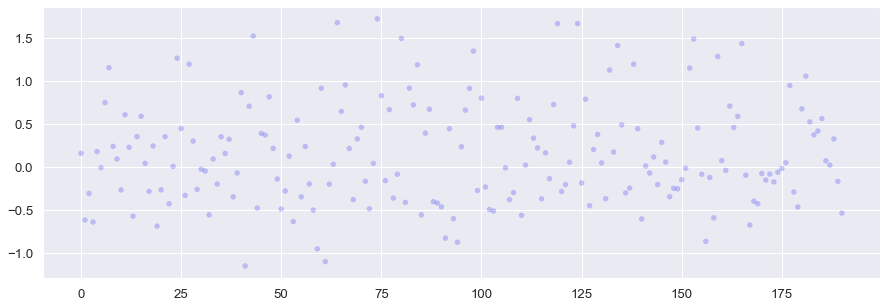

In [ ]:
thinkplot.Scatter(thinkstats2.Jitter(dfLE["isDeveloped"]==1.0))
#thinkplot.Scatter(thinkstats2.Jitter(dfLE["isDeveloped"]==0.0))

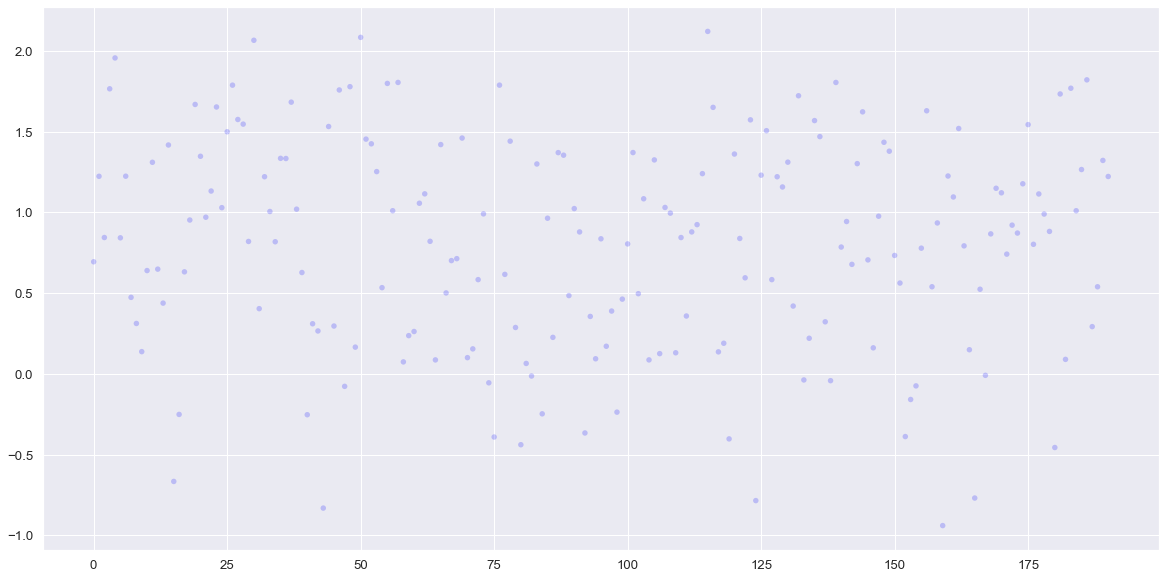

In [ ]:
thinkplot.Scatter(thinkstats2.Jitter(dfLE["isDeveloped"]==0.0))

In [ ]:
df_dev=dfLE[dfLE["isDeveloped"]==1.0]
df_ndev=dfLE[dfLE["isDeveloped"]==0.0]

In [ ]:
df_dev

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750,0.007551
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750,0.005224
15,Belgium,1.0,80.68125,70.1875,0.2500,11.042667,74.500000,81.5625,50.89375,1.0000,97.7500,97.3125,16915.306000,2.884043e+06,16.78750,0.005865
24,Bulgaria,1.0,72.85000,125.5000,0.9375,10.865333,94.500000,1530.3125,54.50000,1.0000,94.2500,94.0000,4938.981821,5.290924e+06,13.72500,0.000933
40,Croatia,1.0,76.11875,89.0000,0.0000,12.448000,96.222222,23.6875,52.35625,0.0000,95.5000,95.3750,9056.784719,1.159772e+06,13.88750,0.007809
42,Cyprus,1.0,79.67500,54.1250,0.0000,10.260667,92.625000,1.9375,53.16250,0.0000,98.0000,98.0000,13898.885501,3.902744e+05,13.51875,0.035613
43,Czechia,1.0,76.76875,71.8125,0.0000,13.026000,97.285714,22.9375,55.71250,0.0000,98.0000,98.1250,NaN,NaN,NaN,NaN
47,Denmark,1.0,79.25625,66.0625,0.0000,10.708000,NaN,15.7500,55.82500,0.0000,88.0000,88.0000,33067.407916,4.260081e+06,17.19375,0.007762
64,Germany,1.0,81.17500,71.2500,2.5000,11.628667,77.437500,1497.1875,51.99375,3.2500,94.8125,89.8750,24337.749100,3.875735e+07,16.60000,0.000628
74,Hungary,1.0,73.82500,147.0625,0.5625,11.427333,NaN,2.0625,56.93125,0.8750,98.9375,99.0000,8513.641831,1.604902e+06,15.11875,0.005305


In [ ]:
df_ndev

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,0.000034
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,0.003042
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,0.000132
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,0.000195
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela(BolivarianRepublicof),0.0,73.38750,163.0000,9.3750,7.420000,66.250000,165.0000,54.48750,10.7500,74.6875,68.5000,NaN,NaN,12.78750,NaN
187,VietNam,0.0,74.77500,126.5625,29.1875,3.087333,87.538462,4232.9375,11.18750,36.5000,94.9375,91.7500,NaN,NaN,11.51250,NaN
188,Yemen,0.0,63.86250,211.8125,39.3750,0.047333,55.687500,2761.1875,33.48750,51.6250,67.1250,72.6250,NaN,NaN,8.50625,NaN
189,Zambia,0.0,53.90625,354.3125,33.4375,2.239333,69.818182,6563.8125,17.45000,52.3750,64.3750,74.2500,811.811841,6.260246e+06,11.21250,0.000130


In [ ]:
dfn_l=df_ndev[df_ndev["Lifeexpectancy"]>=70.0]
dfd_l=df_dev[df_dev["Lifeexpectancy"]>=70.0]


In [ ]:

dfd_l.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
count,32.0,32.000000,32.000000,32.000000,32.000000,24.000000,32.000000,32.000000,32.000000,32.000000,32.000000,28.000000,2.600000e+01,29.000000,26.000000
mean,1.0,79.197852,79.685547,1.494141,9.849678,86.194989,499.005859,51.803906,1.810547,93.736328,93.476562,22053.386446,6.830053e+06,15.845474,0.032002
std,0.0,3.223014,31.242662,4.631272,2.379967,12.786378,1278.001056,7.890487,5.436410,4.474241,5.768024,14036.725856,9.816568e+06,1.647126,0.066381
min,1.0,72.806250,49.375000,0.000000,1.762500,48.200000,0.000000,25.606250,0.000000,82.125000,70.625000,4258.940054,9.738406e+04,13.518750,0.000423
25%,1.0,76.606250,60.359375,0.000000,8.779833,80.931490,6.250000,51.029688,0.000000,89.671875,89.843750,9850.294637,1.064112e+06,14.350000,0.003852
50%,1.0,80.521875,66.906250,0.000000,10.299333,92.093750,62.343750,52.759375,0.000000,95.281250,95.000000,19164.121054,3.241919e+06,15.868750,0.007161
75%,1.0,81.559375,79.578125,1.156250,11.477667,94.937500,288.328125,55.834375,1.500000,96.765625,97.078125,32859.431409,6.334470e+06,16.787500,0.011051
max,1.0,82.537500,161.812500,26.187500,13.026000,98.562500,6875.812500,66.181250,30.750000,98.937500,99.000000,57362.874601,3.875735e+07,20.037500,0.255612


In [ ]:
dfn_l.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
count,72.0,72.000000,72.000000,72.000000,72.000000,71.000000,72.000000,72.000000,72.000000,72.000000,72.000000,63.000000,5.100000e+01,71.000000,51.000000
mean,0.0,74.500347,111.633681,10.730035,4.136070,84.092893,1477.399306,45.559288,12.693576,88.322743,88.747396,7308.032801,8.805396e+06,12.968486,0.048506
std,0.0,2.711935,37.768125,36.262018,3.184541,14.780789,7785.155209,11.442669,42.993485,10.764330,10.891730,8401.655807,1.493094e+07,1.649957,0.185616
min,0.0,70.081250,18.750000,0.000000,0.010000,28.846154,0.000000,11.187500,0.000000,55.625000,48.437500,957.903971,3.334250e+03,8.843750,0.000070
25%,0.0,73.059375,73.718750,0.000000,1.383167,78.364583,0.234375,41.606250,0.000000,81.093750,83.421875,2295.164591,6.801222e+05,12.184375,0.000386
50%,0.0,73.850000,116.781250,1.062500,3.663333,87.250000,21.937500,48.606250,1.156250,93.968750,92.125000,3957.227286,2.489104e+06,12.712500,0.001531
75%,0.0,75.251563,141.437500,7.531250,6.179833,96.187500,301.562500,52.910938,8.953125,96.937500,96.828125,7406.948001,1.144660e+07,13.900000,0.008982
max,0.0,82.218750,170.625000,294.875000,12.404667,98.812500,65857.937500,65.650000,350.000000,98.687500,98.750000,40748.444104,8.812807e+07,17.293750,1.145174


In [ ]:
#Visualize correlations. 
a=df_dev.values.tolist()
b=df_ndev.values.tolist()
thinkstats2.Corr(a,b), thinkstats2.SpearmanCorr(a,b)


NameError: name 'df_dev' is not defined

TypeError: unhashable type: 'numpy.ndarray'

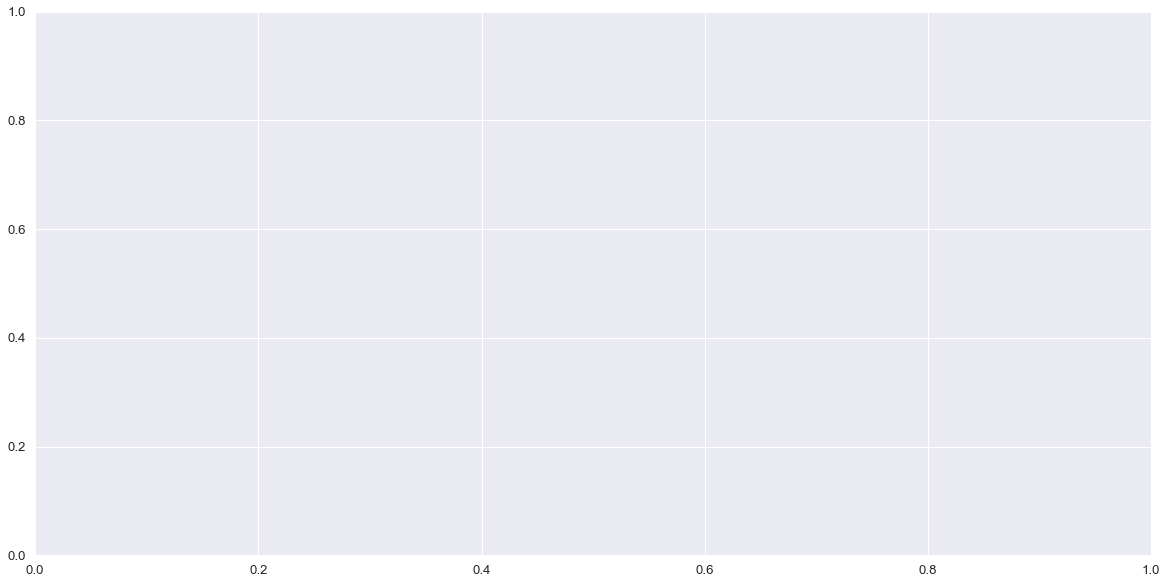

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
thinkplot.Scatter(df_dev, df_ndev)
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])
plt.rcParams["figure.figsize"] = (12,7)


KeyboardInterrupt: 

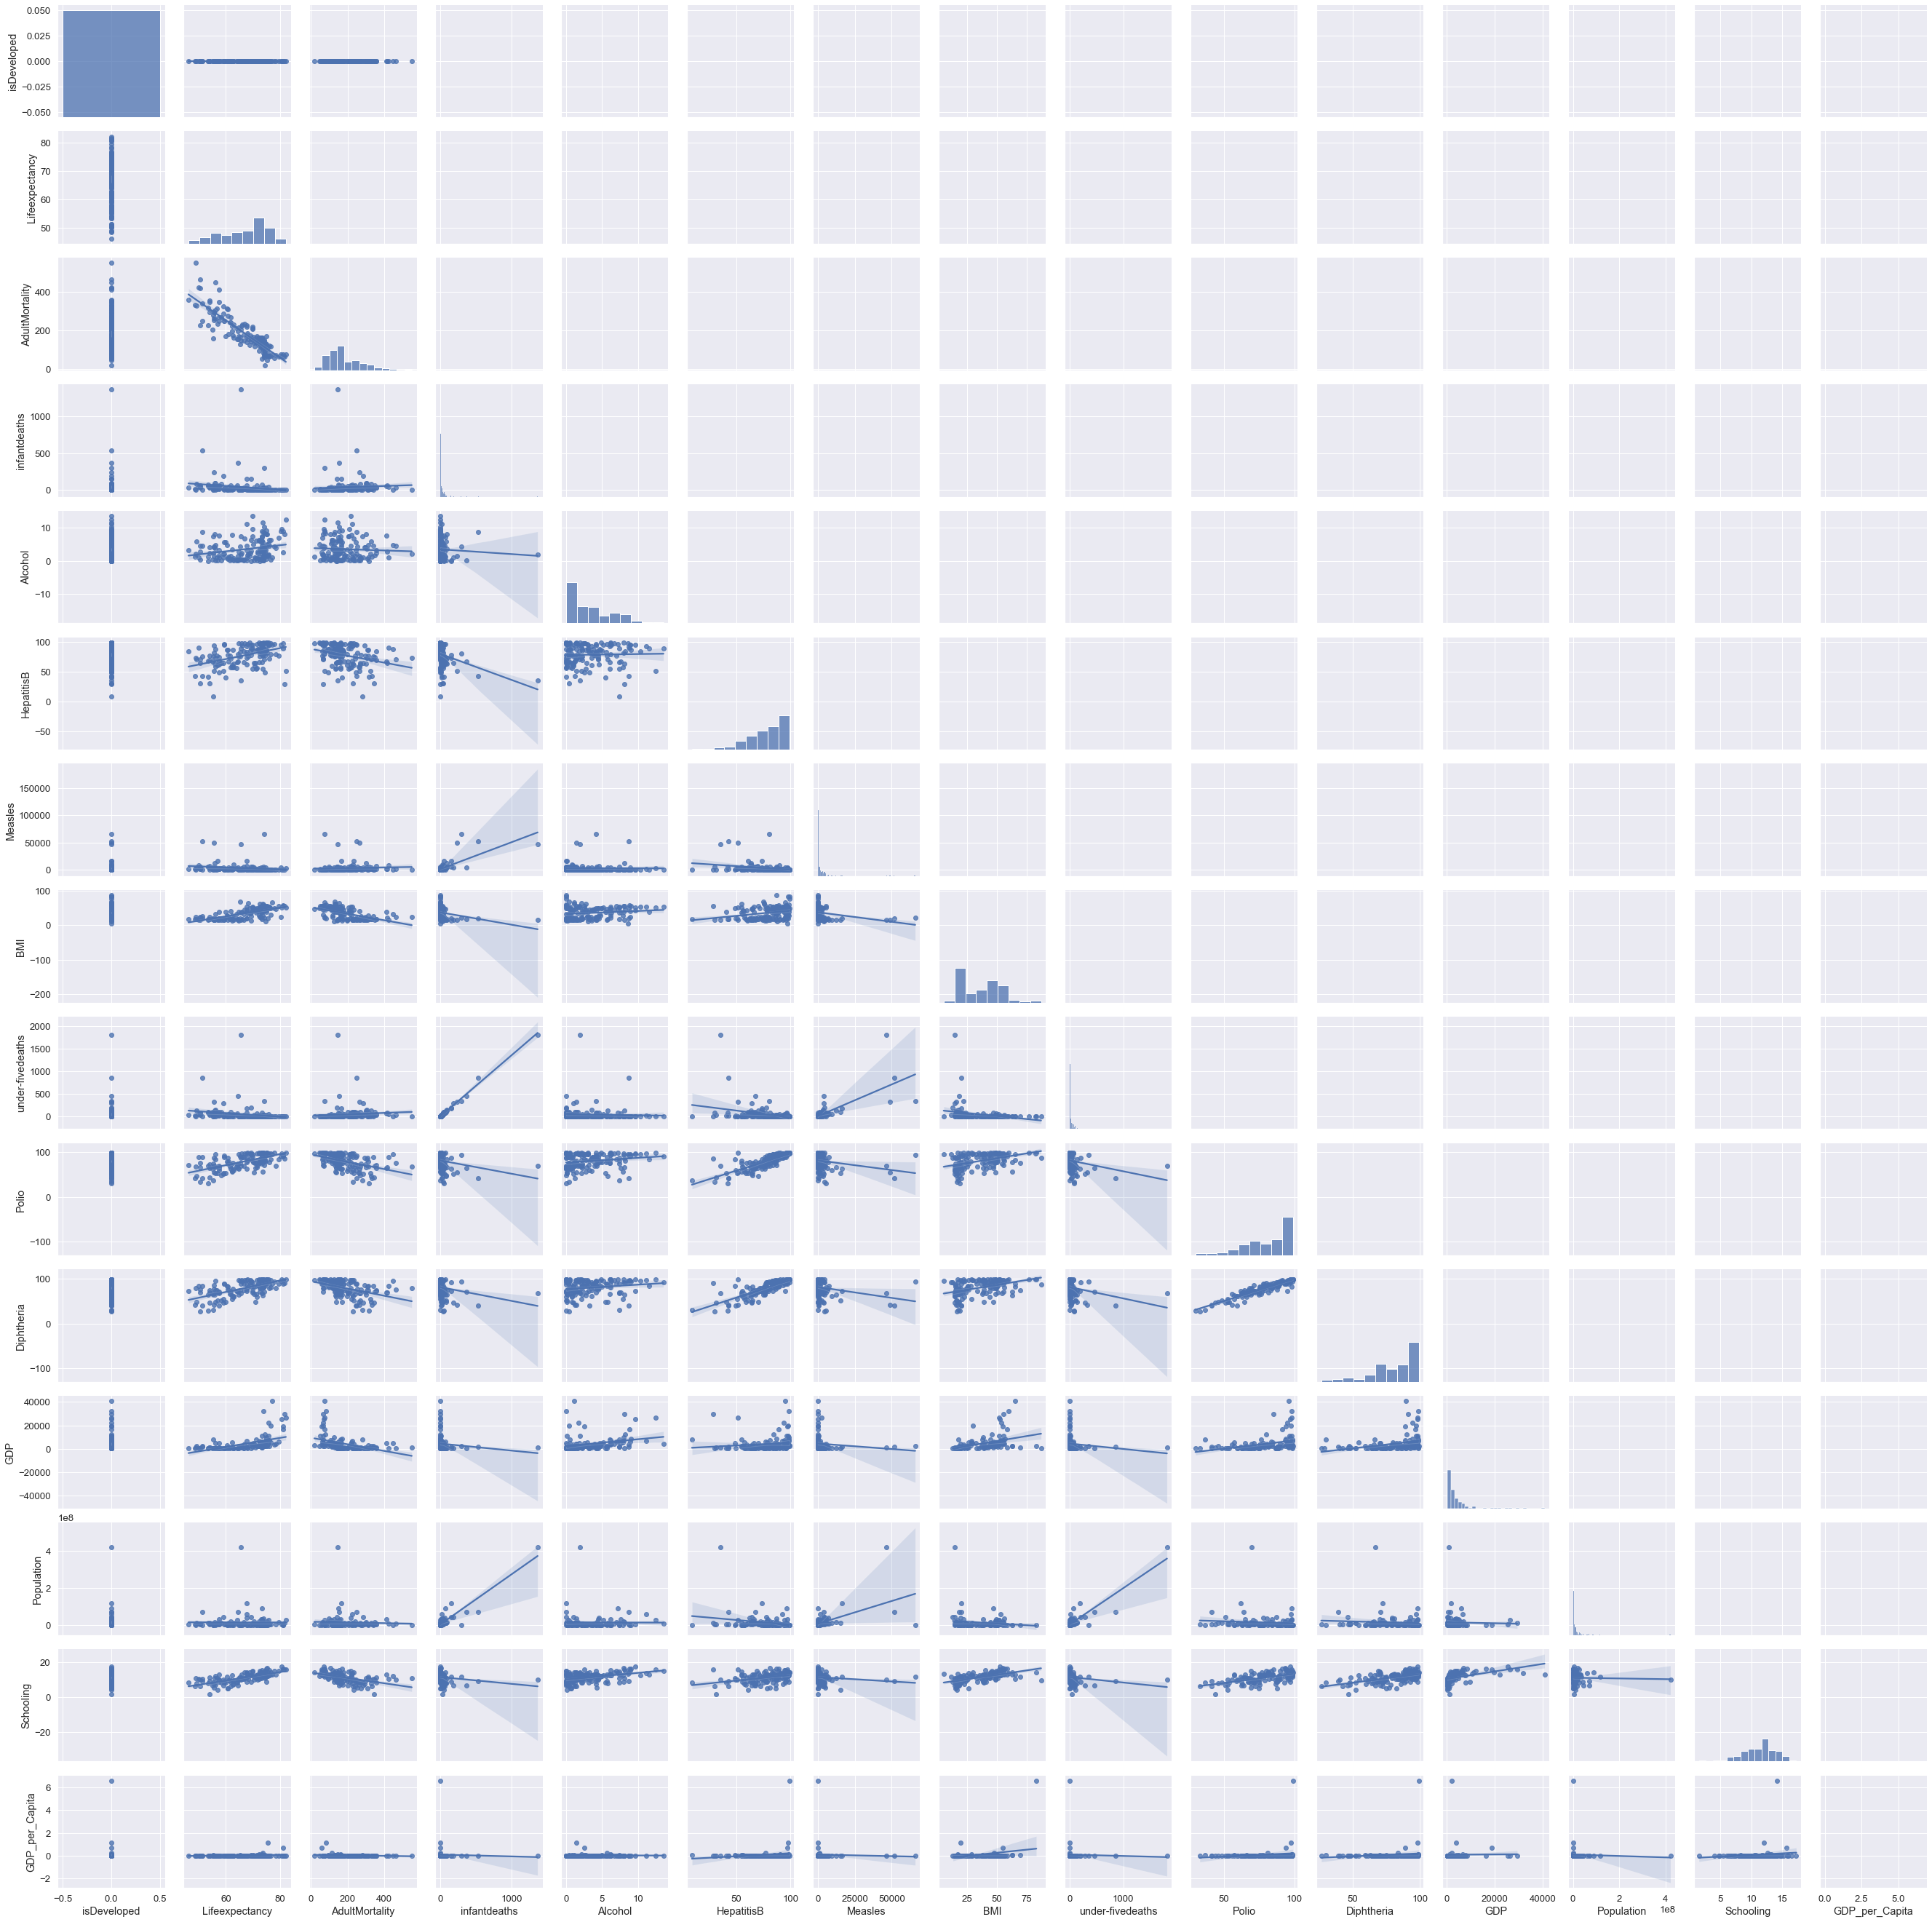

In [ ]:
sns.pairplot(data=df_ndev, kind="reg")
plt.show()


### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
#Calculate correlations and analyze. 